In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('natural_science_students.csv')
df.head()

,student_id,math,literature,english,physics,chemistry,biology,history,geography,civic_education,foreign_language_code
0,1000001,8.4,6.75,8.0,6.00,5.25,5.00,7.0,7.0,7.0,N1
1,1000009,8.2,8.00,8.6,8.25,4.25,6.00,7.0,7.0,7.0,N1
2,1000011,7.2,8.50,9.0,7.75,6.75,6.25,7.0,7.0,7.0,N1
3,1000017,7.0,8.75,7.8,3.75,7.50,7.25,7.0,7.0,7.0,N1
4,1000018,8.2,6.00,9.0,7.75,6.75,6.75,7.0,7.0,7.0,N1


In [3]:
df.isna().sum()

student_id               0
math                     0
literature               0
english                  0
physics                  0
chemistry                0
biology                  0
history                  0
geography                0
civic_education          0
foreign_language_code    0
dtype: int64

In [4]:
# Calculate total scores for different combinations
df['natural_science_score'] = df['math'] + df['literature'] + df['english'] + df['physics'] + df['chemistry'] + df['biology']
df['A00_score'] = df['math'] + df['physics'] + df['chemistry']
df['A01_score'] = df['math'] + df['physics'] + df['english']
df['D01_score'] = df['math'] + df['literature'] + df['english']
df['B00_score'] = df['math'] + df['chemistry'] + df['biology']

# Scores Breakdown by Subjects

In [5]:
def calculate_statistics(series):
    return pd.Series({
        'Mean': series.mean(),
        'Median': series.median(),
        'Mode': series.mode().iloc[0],
        'Variance': series.var(),
        'Std Dev': series.std(),
        'Range': series.max() - series.min(),
        'Highest': series.max(),
        'Lowest': series.min()
    })
    
# Calculate statistics for each subject
subjects = ['math', 'literature', 'english', 'physics', 'chemistry', 'biology']
stats_df = df[subjects].apply(calculate_statistics)

print(stats_df.T)

                Mean  Median  Mode  Variance   Std Dev  Range  Highest  Lowest
math        7.565475    7.80  8.00  0.870375  0.932939    8.2      9.8     1.6
literature  7.308816    7.50  8.00  1.239005  1.113106   10.0     10.0     0.0
english     6.306830    6.20  5.40  3.326295  1.823813    9.4     10.0     0.6
physics     6.669814    7.00  8.00  2.651489  1.628339   10.0     10.0     0.0
chemistry   6.676429    6.75  7.75  2.687474  1.639352   10.0     10.0     0.0
biology     6.274907    6.25  6.50  1.538529  1.240375   10.0     10.0     0.0


In [6]:
def count_students_with_score(df, subject, score):
    # Filter the dataframe to include only students with the specified score
    students_with_score = df[df[subject] == score]
    
    # Count the number of students
    count = len(students_with_score)
    
    return count

subject_score_count = count_students_with_score(df, 'math', 9.8)
print(f"Number of students who got x_score in y_subject: {subject_score_count}")

Number of students who got x_score in y_subject: 40


In [7]:
def plot_subject_histogram(scores, subject):
    plt.figure(figsize=(12, 8))
    
    # Determine the interval based on the subject
    if subject.lower() in ['math', 'english']:
        interval = 0.2
    else:
        interval = 0.25
    
    # Round scores to nearest interval to address floating-point imprecision
    rounded_scores = np.round(scores / interval) * interval
    
    # Create bins with a slightly larger range to ensure all data points are included
    bins = np.arange(0, 10.01 + interval, interval)
    
    # Create histogram with custom bins
    counts, bins, patches = plt.hist(rounded_scores, bins=bins, edgecolor='black', align='left')
    
    # Add count labels above each bar
    for i in range(len(counts)):
        if counts[i] > 0:
            plt.text(bins[i], counts[i] + 500, f'{int(counts[i])}', 
                     ha='center', va='bottom', rotation=90)
    
    plt.title(f'Histogram of {subject.capitalize()} Scores', fontsize=16)
    plt.xlabel('Score', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlim(0, 10)
    plt.ylim(0, max(counts) * 1.3)  # Extend y-axis to make room for vertical labels
    
    # Set x-axis ticks to show all intervals
    plt.xticks(np.arange(0, 10.01, interval), rotation=90, ha='center')
    
    # Adjust layout to prevent cutting off labels
    plt.tight_layout()
    
    # Add grid lines
    plt.grid(True, alpha=0.3)
    plt.grid(which='minor', alpha=0.2)
    
    plt.show()

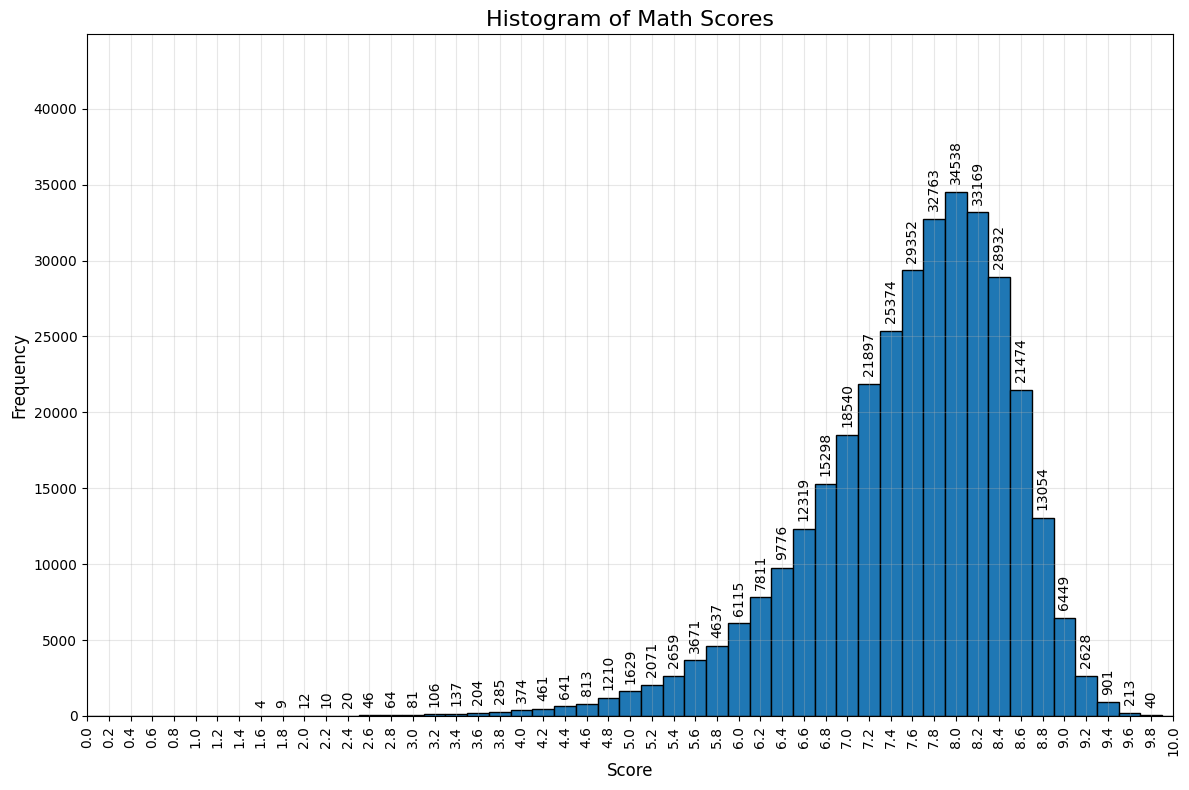

In [8]:
math_scores = df['math']
plot_subject_histogram(math_scores, 'math')

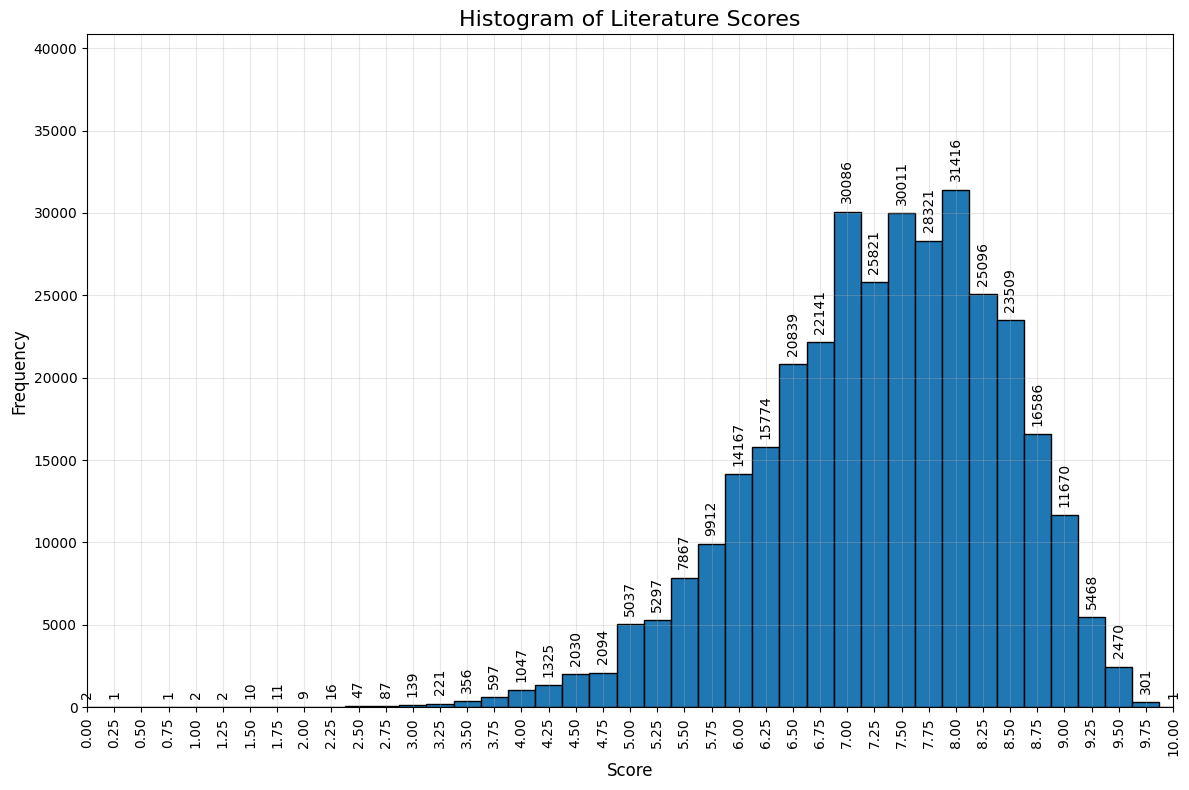

In [9]:
literature_scores = df['literature']
plot_subject_histogram(literature_scores, 'literature')

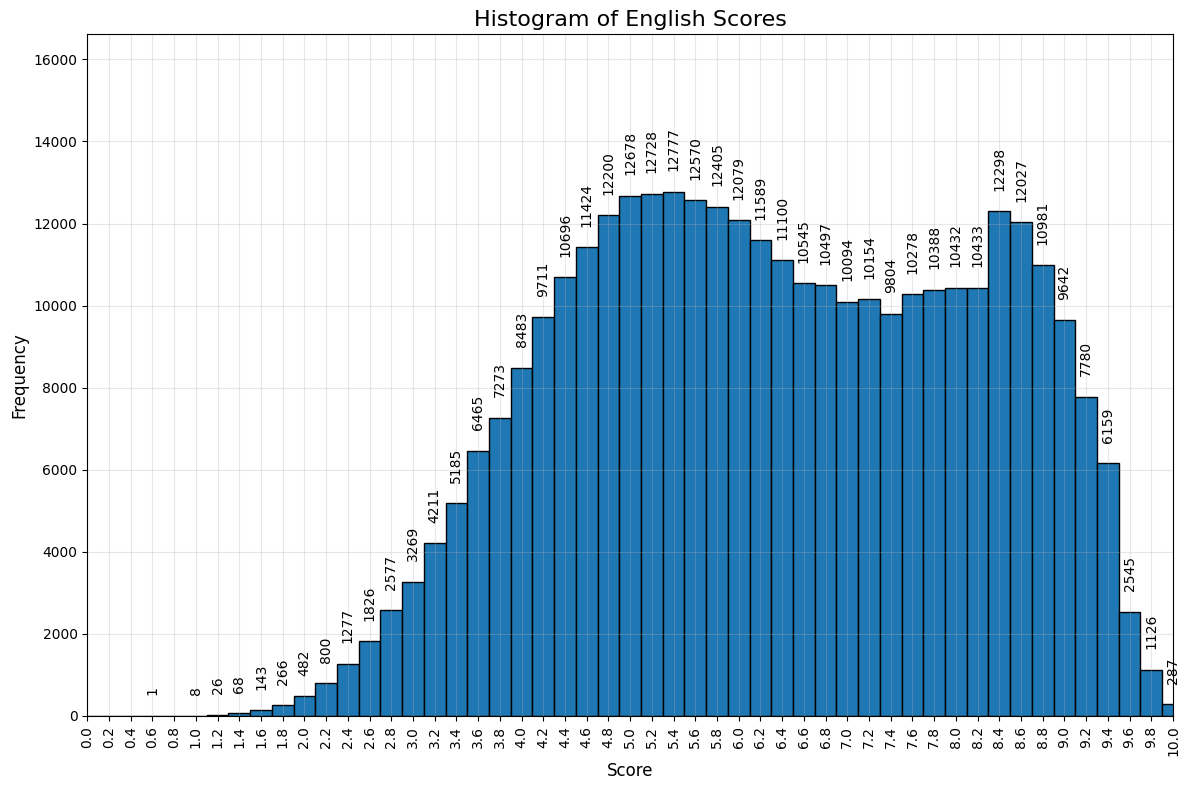

In [10]:
english_scores = df['english']
plot_subject_histogram(english_scores, 'english')

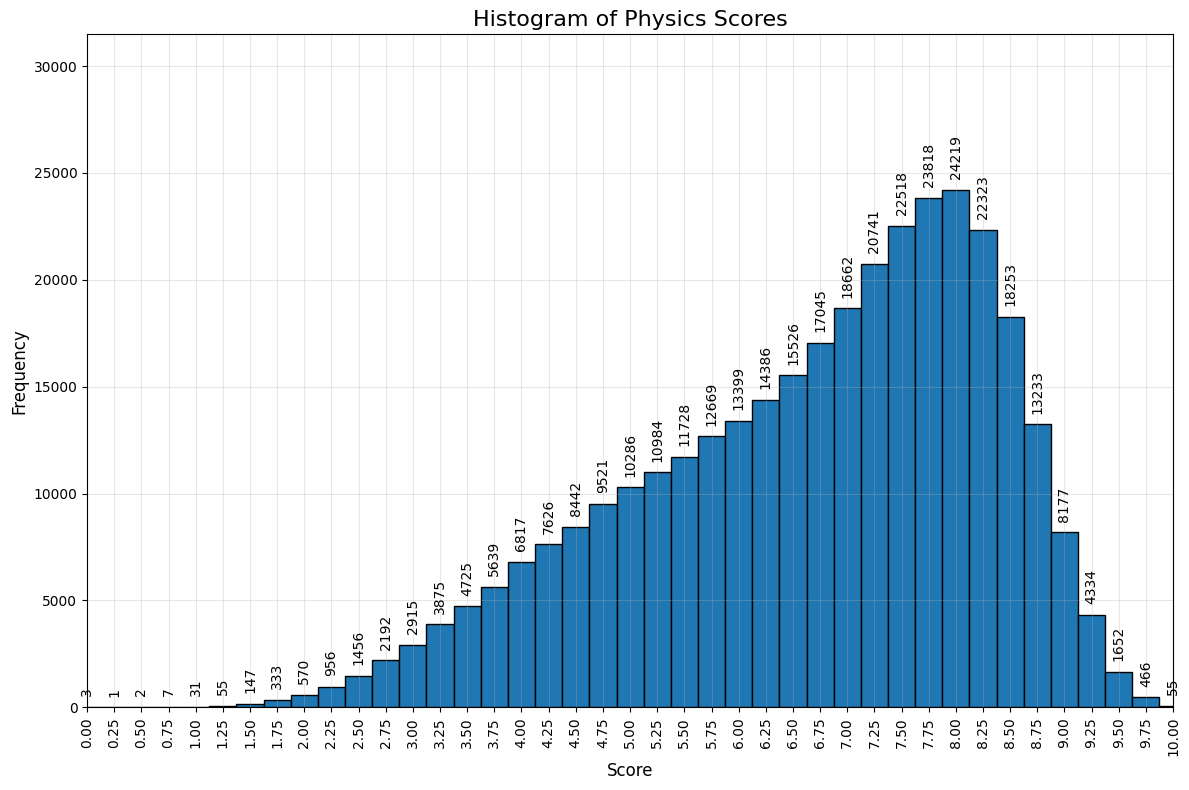

In [11]:
physics_scores = df['physics']
plot_subject_histogram(physics_scores, 'physics')

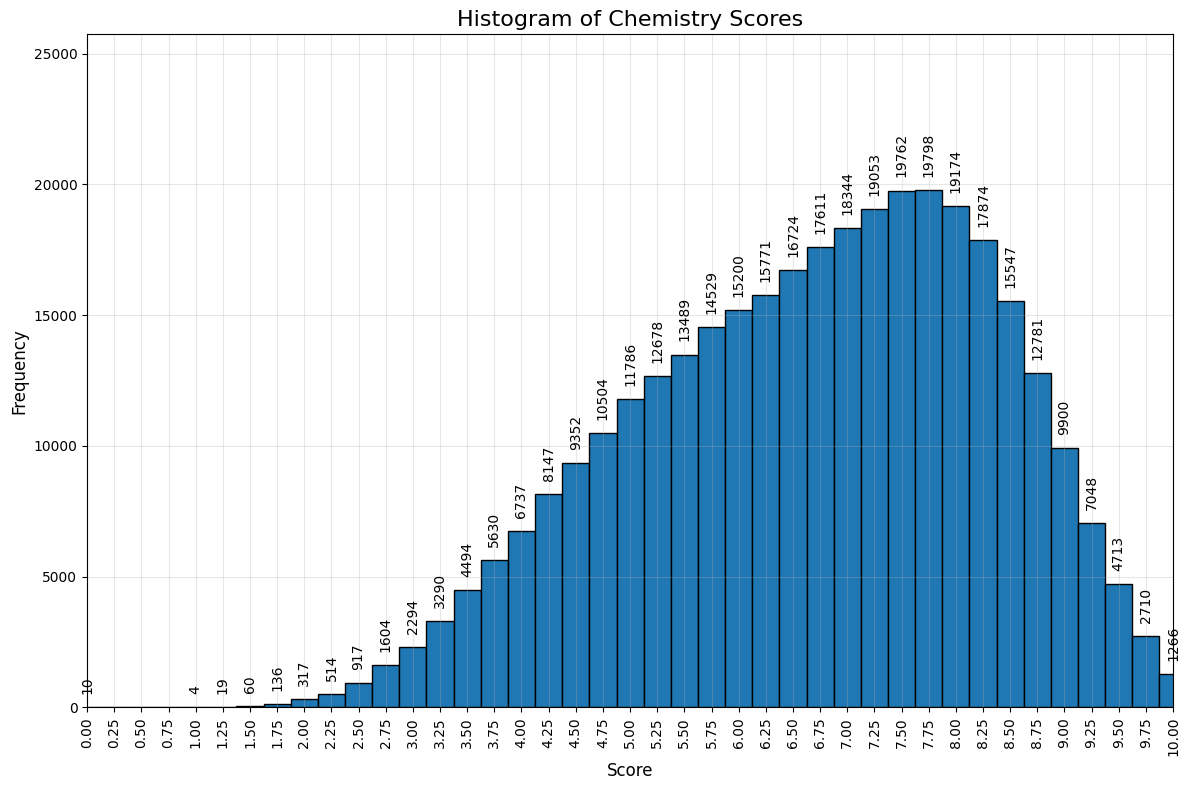

In [12]:
chemistry_scores = df['chemistry']
plot_subject_histogram(chemistry_scores, 'chemistry')

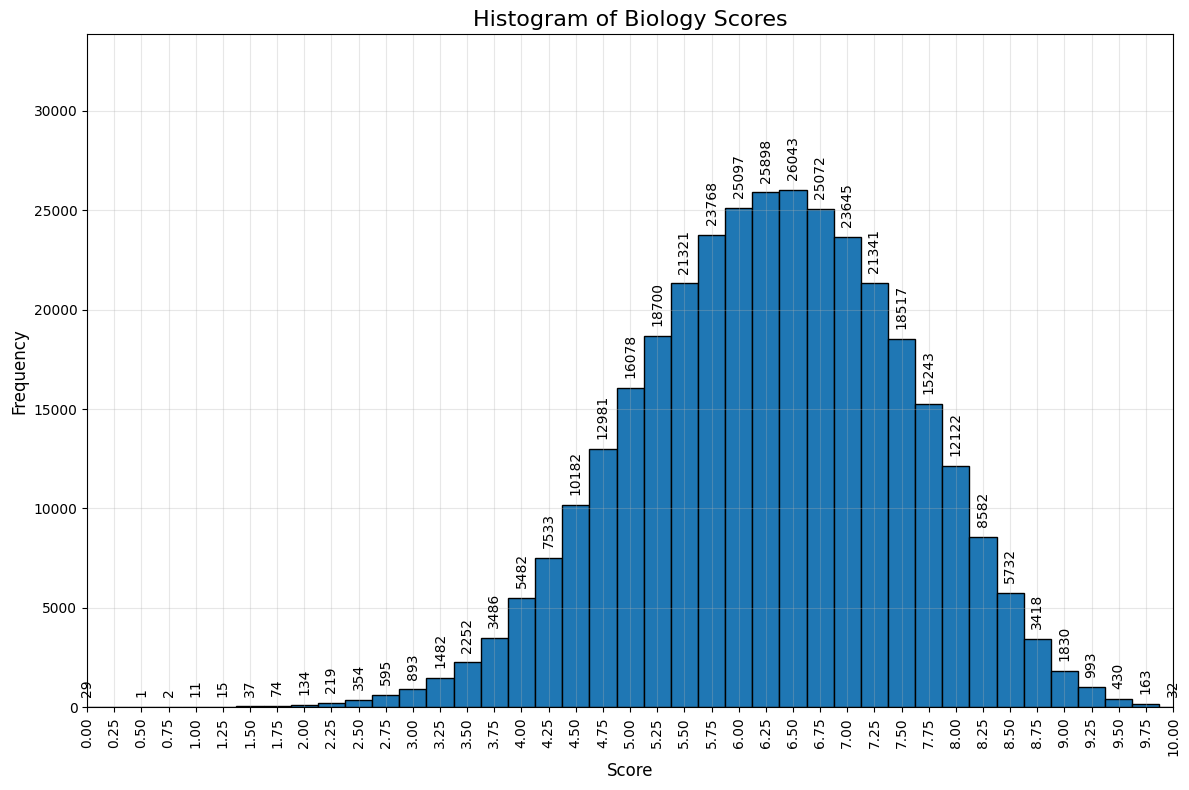

In [13]:
biology_scores = df['biology']
plot_subject_histogram(biology_scores, 'biology')

# Top Scorers 

In [14]:
def find_highest_score(df, subject):
    """
    Find the student(s) with the highest score in a given subject.
    
    Parameters:
    df (pandas.DataFrame): The dataframe containing student scores
    subject (str): The name of the subject column in the dataframe
    
    Returns:
    pandas.DataFrame: A dataframe containing the student(s) with the highest score
    """
    # Sort the dataframe by the subject score in descending order
    sorted_df = df.sort_values(by=subject, ascending=False)
    
    # Get the highest score
    highest_score = sorted_df[subject].iloc[0]
    
    # Filter the dataframe to include only students with the highest score
    highest_scorers = sorted_df[sorted_df[subject] == highest_score]
    
    return highest_scorers

top_literature_students = find_highest_score(df, 'literature')
print(top_literature_students)

        student_id  math  literature  english  physics  chemistry  biology  \
284693    50014414   7.0        10.0      9.0     7.75       7.75      7.5   

        history  geography  civic_education foreign_language_code  \
284693      7.0        7.0              7.0                    N1   

        natural_science_score  A00_score  A01_score  D01_score  B00_score  
284693                   49.0       22.5      23.75       26.0      22.25  
